In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Xtrain = pd.read_csv('Linear_X_Train.csv')
Ytrain = pd.read_csv('Linear_Y_Train.csv')

In [9]:
Ytrain.shape,Xtrain.shape

((3750, 1), (3750, 1))

In [11]:
plt.style.use('seaborn')

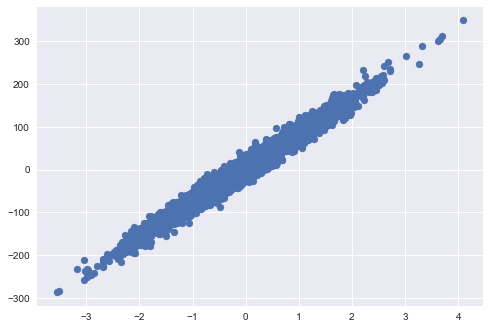

In [12]:
plt.scatter(Xtrain,Ytrain);

In [15]:
# Converting DataFrame to numpy arrays
Xtrain = Xtrain.values
Ytrain = Ytrain.values
Xtrain.shape

(3750, 1)

### Normalizing Data

In [18]:
u = Xtrain.mean()
std = Xtrain.std()
Xtrain = (Xtrain - u)/std

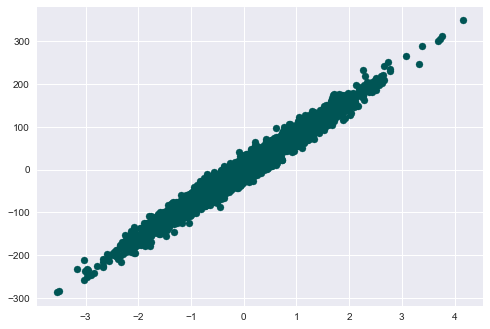

In [42]:
plt.scatter(Xtrain,Ytrain,color='#055');

# Linear Regression

In [20]:
def hypothesis(x,theta):
    #theta = [c, m] 2 values
    return theta[0] + theta[1] * x 

In [56]:
def gradient(X,Y,theta):
    m=X.shape[0]
    grad = np.zeros((2,1)) ## [c->0,m->0] initially
    for i in range(m):
        x = X[i]
        y_pred   = hypothesis(x,theta)
        y_actual = Y[i]
        grad[0] += (y_pred - y_actual)
        grad[1] += (y_pred - y_actual) * x
        
    return grad / m
    

In [102]:
def gradient_descent(X,Y,max_steps=100,learning_rate = 0.1):
    theta = np.zeros((2,))
    theta_list = []
    error_list = []
    for i in range(max_steps):
        #compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate * grad[0]        
        theta[1] = theta[1] - learning_rate * grad[1]
        theta_list.append((theta[0],theta[1])) 
    return theta,error_list,theta_list

In [103]:
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        pred = hypothesis(X[i],theta)
        total_error += (pred - Y[i])**2
    return total_error / m

In [104]:
theta,error_list,theta_list = gradient_descent(Xtrain,Ytrain)

In [105]:
theta

array([ 0.6838508 , 79.90361453])

In [72]:
 error_list[0:-1:5]

[array([6576.35005246]),
 array([2417.40496367]),
 array([967.27047765]),
 array([461.63984713]),
 array([285.33734761]),
 array([223.8644671]),
 array([202.43019901]),
 array([194.95653185]),
 array([192.35062524]),
 array([191.44200179]),
 array([191.12518438]),
 array([191.01471698]),
 array([190.97619938]),
 array([190.96276913]),
 array([190.95808628]),
 array([190.95645348]),
 array([190.95588415]),
 array([190.95568564]),
 array([190.95561643]),
 array([190.95559229])]

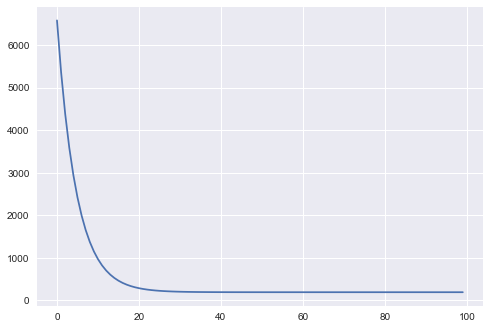

In [73]:
plt.plot(error_list);

# Predictions and Best Line

In [74]:
y_pred = hypothesis(Xtrain, theta)

In [75]:
y_pred

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

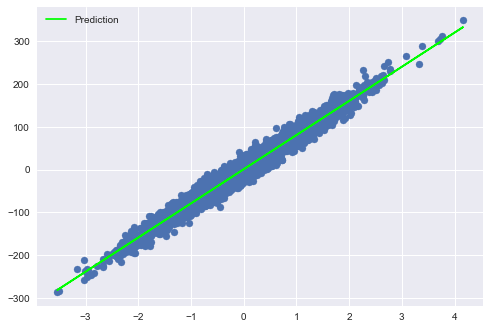

In [99]:
plt.scatter(Xtrain,Ytrain)
plt.plot(Xtrain,y_pred,c='lime',label='Prediction')
plt.legend()
plt.show()

# R2 score 
[https://en.wikipedia.org/wiki/Coefficient_of_determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

[R2 score](https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/)

In [100]:
def r2_score(y_actual,y_pred):
    num = np.sum((y_actual-y_pred)**2)
    denom = np.sum((y_actual- y_actual.mean())**2)
    score = 1-(num/denom)
    return score*100

In [101]:
r2_score(Ytrain,y_pred)

97.09612226971643

# 3d Plot of how theta value is changing

In [118]:
theta_list = np.array(theta_list)

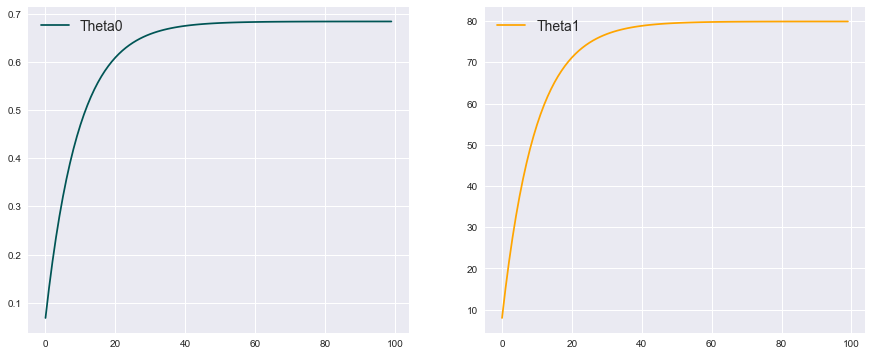

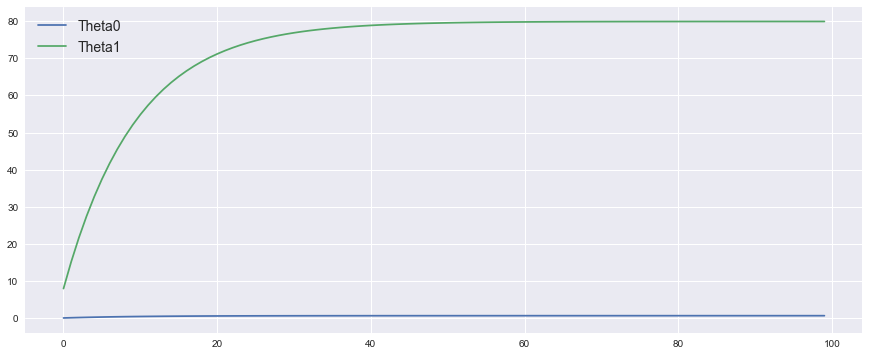

In [153]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(theta_list[:,0],label ='Theta0',c='#055')
plt.legend(fontsize=14)
plt.subplot(1,2,2)
plt.plot(theta_list[:,1],label ='Theta1',c='orange')
plt.legend(fontsize=14)
plt.show()
plt.figure(figsize=(15,6))
plt.plot(theta_list[:,0],label='Theta0')
plt.plot(theta_list[:,1],label='Theta1')
plt.legend(fontsize=14)
plt.show()

In [162]:
# Loss Actually
T0 = np.arange(-50,50)
T1 = np.arange(30,130)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        temp_y = T1[i,j] * Xtrain + T0[i,j]
        J[i,j] = np.sum((Ytrain - temp_y)**2) / Ytrain.shape[0]
        

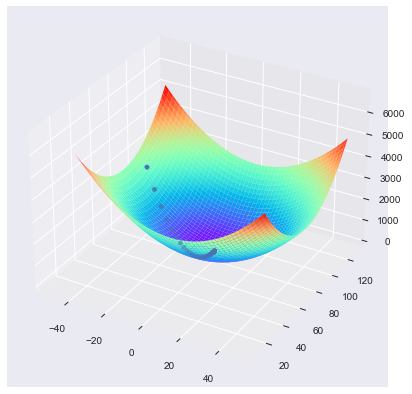

In [170]:
fig = plt.figure(figsize=(10,7))
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

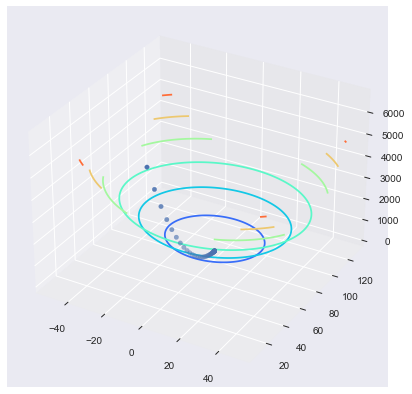

In [171]:
fig = plt.figure(figsize=(10,7))
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

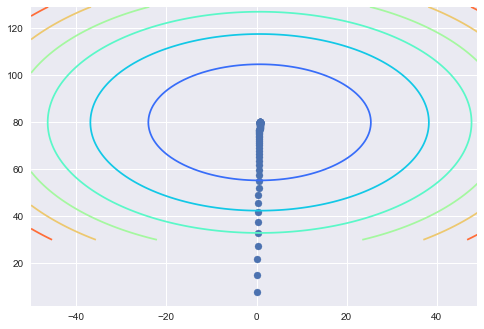

In [172]:
#2D contour plot

plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()